Como se aprecia varios de los términos que fueron procesados por los _stemmers_ incluyen números y caracteres especiales.

Entonces, es necesario realizar un estudio de las categorías de los textos del corpus con el fin de conocer diferencias sistemáticas entre las categorías. Para esto, realizaremos las siguientes actividades:

* Descargar la colección de textos del corpus
* Carga de la colección de textos del corpus a NLTK
* Contar, plotear y tabular distribuciones

**Descargar la colección de textos del corpus**

In [74]:
import os
import classicdb.fetch as fetch

url = fetch.URL
data_home = fetch.get_data_home()
classic_home = os.path.join(data_home, fetch.CLASSIC_HOME)
# fetch.download_and_unzip(url, classic_home, fetch.ARCHIVE_NAME)
print(url + " was downloaded and extracted to " + classic_home)

https://sites.google.com/site/xchgdir/public/classic.tar.gz?attredirects=0&d=1 was downloaded and extracted to C:\Users\khas.aiur\scikit_learn_data\classic_home


**Carga de la colección de textos del corpus a NLTK** 

In [75]:
from nltk.corpus import CategorizedPlaintextCorpusReader

data_home = fetch.get_data_home()
classic_home = os.path.join(data_home, fetch.CLASSIC_HOME)
corpus_root = os.path.join(classic_home, fetch.TRAIN_FOLDER)
corpus_reader = CategorizedPlaintextCorpusReader(corpus_root, r'.*', cat_pattern=r'(\w+)/*')

cats = corpus_reader.categories()
for cat in enumerate(cats):
    print(corpus_reader.fileids(categories=cat)[0:3])

['cacm/cacm.000001', 'cacm/cacm.000002', 'cacm/cacm.000003']
['cisi/cisi.000001', 'cisi/cisi.000002', 'cisi/cisi.000003']
['cran/cran.000001', 'cran/cran.000002', 'cran/cran.000003']
['med/med.000001', 'med/med.000002', 'med/med.000003']


__Algunas estadísticas del corpus__ Se puede apreciar que la longitud promedio de palabras no varía, pues es una característica propia del lenguaje. La longitud promedio de oraciones y el score de diversidad léxica parecería tener un caracter discriminatorio apropiado. 

* MEDLINE: abstracts from medical journals
* CISI: abstracts from information retrieval papers
* CRANFIELD: abstracts from the aerodynamic systems literature

In [76]:
print("Avg word length\tAvg sentence length\tLexical diversity score*")
for i, cat in enumerate(cats):
    # print(corpus_reader.words(categories=cat)[0:5])
    num_chars = len(corpus_reader.raw(categories=cat)) # is counting spaces and punctuation too
    num_words = len(corpus_reader.words(categories=cat))
    num_sents = len(corpus_reader.sents(categories=cat))
    num_vocab = len(set(w.lower() for w in corpus_reader.words(categories=cat)))
    print(round(num_chars / num_words, 2), "\t", round(num_words / num_sents, 2), "\t", round(num_words / num_vocab, 2),
          "\t", cat)

print("*The lexical diversity score is the number of times each vocabulary item appears in the text on average")

Avg word length	Avg sentence length	Lexical diversity score*


5.97 	 23.0 	 20.3 	 cacm


5.95 	 32.7 	 20.71 	 cisi


5.84 	 23.69 	 36.03 	 cran


6.07 	 25.0 	 13.56 	 med
*The lexical diversity score is the number of times each vocabulary item appears in the text on average


A continuación se muestran las palabras que más se repiten en cada categoría. Además, se puede apreciar que las primeras 50 palabras que se repiten representan aproximadamente el 50% de todo el texto.

* CACM: ('algorithm', 1544), ('system', 1103), ('computer', 991), ('data', 728), ('program', 688), ('time', 673), ('method', 662), ('language', 617), ('programming', 528)
* CISI: ('information', 1596), ('library', 1273), ('system', 770), ('libraries', 612), ('data', 601), ('research', 571), ('retrieval', 557), ('systems', 496), ('science', 459)
* CRAN: ('flow', 2179), ('boundary', 1371), ('pressure', 1330), ('layer', 1189), ('number', 1031), ('mach', 911), ('results', 896), ('theory', 873), ('shock', 795), ('heat', 749)
* MED: ('patients', 646), ('cells', 542), ('cases', 374), ('normal', 351), ('growth', 338), ('blood', 314)

Category: cacm


<FreqDist with 9695 samples and 196845 outcomes>
[('the', 11014), ('of', 9029), ('.', 7038), ('a', 5916), (',', 5232), ('and', 4536), ('to', 3770), ('is', 3727), ('in', 3446), ('for', 3164), ('-', 2793), ('are', 1988), ('(', 1934), ('algorithm', 1544), ('an', 1403), (')', 1389), ('on', 1245), ('by', 1227), ('be', 1201), ('which', 1183), ('this', 1167), ('with', 1125), ('system', 1103), ('that', 1098), ('computer', 991), ('as', 961), ('data', 728), ('it', 719), ('program', 688), ('time', 673), ('method', 662), ('language', 617), ('can', 594), ('"', 585), ('from', 530), ('programming', 528), ('systems', 518), ('paper', 514), ('or', 494), ('described', 457), ('problem', 456), ('presented', 434), ('use', 433), ('given', 432), ('used', 419), ('number', 417), ('these', 404), ('one', 403), ('s', 401), ('[', 398)]


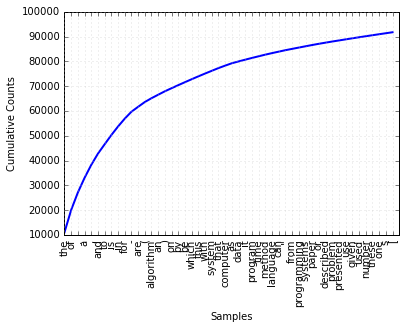


Category: cisi


<FreqDist with 10121 samples and 209644 outcomes>
[('the', 13344), ('of', 11232), (',', 7881), ('and', 6406), ('in', 4630), ('to', 4612), ('a', 4383), ('.', 4378), ('..', 2788), ('is', 2599), ('for', 2408), ('-', 2098), ('are', 1690), ('information', 1596), ('that', 1550), ('this', 1422), ('as', 1378), ('on', 1353), ('library', 1273), ('by', 1201), ('be', 1194), ('with', 1113), ('an', 1077), ('which', 1052), ('it', 991), ('(', 842), ('system', 770), ('or', 743), ('"', 722), ('have', 689), ('from', 679), ("'", 663), ('has', 628), ('libraries', 612), (')', 605), ('data', 601), ('was', 598), ('been', 575), ('research', 571), ('retrieval', 557), ('these', 549), ('use', 526), ('not', 514), (';', 503), (':', 498), ('systems', 496), ('at', 477), ('their', 467), ('were', 465), ('science', 459)]


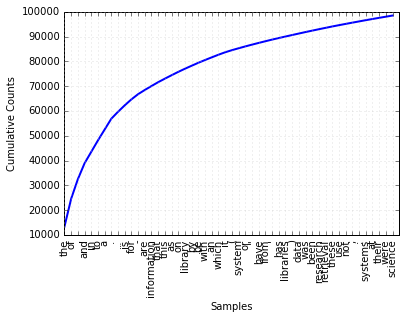


Category: cran


<FreqDist with 7520 samples and 270952 outcomes>
[('the', 20181), ('of', 13969), ('.', 12361), (',', 6829), ('and', 6582), ('a', 6496), ('-', 5514), ('in', 5025), ('to', 4717), ('is', 4115), ('for', 3704), ('with', 2441), ('are', 2428), ('on', 2329), ('flow', 2179), ('at', 2074), ('by', 1799), ('that', 1569), ('an', 1517), ('boundary', 1371), ('pressure', 1330), ('be', 1271), ('layer', 1189), ('from', 1165), ('as', 1124), ('this', 1082), ('number', 1031), ('which', 981), ('mach', 911), ('results', 896), ('theory', 873), ('it', 856), ('shock', 795), ('heat', 749), ('method', 737), ('was', 698), ('two', 693), ('(', 646), ('wing', 641), ('supersonic', 629), ('surface', 623), ('/', 606), ('body', 600), ('effects', 598), ('been', 592), ('were', 583), ('transfer', 581), ('temperature', 564), ('obtained', 542), ('laminar', 531)]


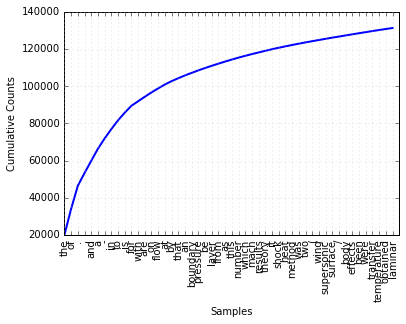


Category: med


<FreqDist with 13388 samples and 181477 outcomes>
[('the', 11240), ('of', 9342), ('.', 8335), (',', 5475), ('in', 5405), ('and', 4829), ('-', 3876), ('a', 2740), ('to', 2706), ('with', 1898), ('is', 1582), ('was', 1499), ('were', 1216), ('by', 1207), ('that', 970), ('(', 928), ('for', 925), ('be', 836), ('from', 833), ('as', 814), ('are', 750), ('on', 747), (')', 700), ('or', 658), ('this', 657), ('patients', 646), ('an', 640), ('not', 606), ('cells', 542), ('it', 515), ('which', 499), ('at', 498), ('these', 464), ('after', 437), ('2', 421), ("'", 399), ('been', 389), ('cases', 374), ('1', 372), ('normal', 351), ('but', 349), ('growth', 338), ('have', 333), ('may', 327), ('blood', 314), ('during', 312), ('than', 309), ('has', 305), ('3', 298), ('found', 289)]


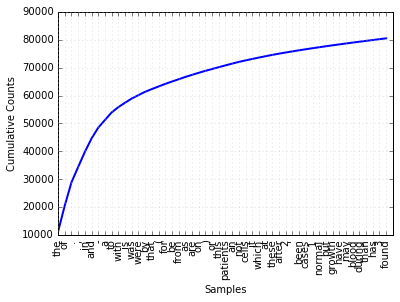


* samples=count of words without duplicates, outcomes=count of words including duplicates


In [77]:
% matplotlib inline

from nltk.probability import FreqDist
for i, cat in enumerate(cats):
    # print(len(corpus_reader.words(categories=cat)))
    # print(len(set(corpus_reader.words(categories=cat))))
    print("Category: " + str(cat))
    lowercase_words = [w.lower() for w in corpus_reader.words(categories=cat)]
    freq_dist = FreqDist(lowercase_words)
    print(freq_dist)
    print(freq_dist.most_common(50))
    freq_dist.plot(50, cumulative=True)
    print()

print("* samples=count of words without duplicates, outcomes=count of words including duplicates")

Logintud de palabras por categorías:

Frequency for word length for category:  CACM


2 	 30353 	 15.42%
1 	 29691 	 15.08%
3 	 28231 	 14.34%
4 	 18022 	 9.16%
7 	 15074 	 7.66%
8 	 14392 	 7.31%
5 	 14319 	 7.27%
9 	 13292 	 6.75%
6 	 12322 	 6.26%
10 	 8756 	 4.45%

Frequency for word length for category:  CISI


2 	 36894 	 17.6%
3 	 32672 	 15.58%
1 	 24675 	 11.77%
4 	 21289 	 10.15%
7 	 17108 	 8.16%
5 	 15562 	 7.42%
8 	 14439 	 6.89%
9 	 12062 	 5.75%
6 	 12034 	 5.74%
10 	 9176 	 4.38%

Frequency for word length for category:  CRAN


2 	 42231 	 15.59%
3 	 41154 	 15.19%
1 	 37329 	 13.78%
4 	 30248 	 11.16%
5 	 23399 	 8.64%
8 	 19924 	 7.35%
6 	 18397 	 6.79%
7 	 18317 	 6.76%
9 	 13808 	 5.1%
10 	 10380 	 3.83%

Frequency for word length for category:  MED


2 	 29325 	 16.16%
1 	 27105 	 14.94%
3 	 26781 	 14.76%
4 	 18100 	 9.97%
5 	 14185 	 7.82%
7 	 12592 	 6.94%
8 	 12550 	 6.92%
6 	 12056 	 6.64%
9 	 9861 	 5.43%
10 	 6614 	 3.64%



Word Length Distributions


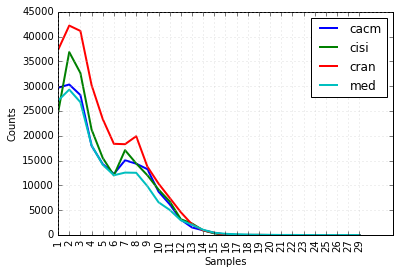

Cumulative Word Length Distributions


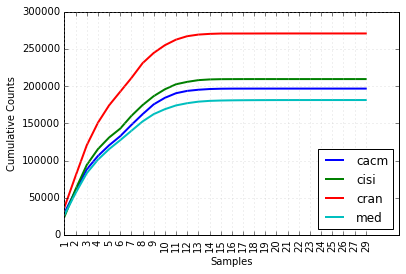

In [90]:
% matplotlib inline
from nltk.probability import FreqDist

for i, cat in enumerate(cats):
    print("Frequency for word length for category: ", cat.upper())
    freq_dist = FreqDist(len(word) for word in corpus_reader.words(categories=cat))
    # import operator
    # sorted_items = sorted(freq_dist.items(), key=operator.itemgetter(1)) # sort by item.value
    # for i, k in enumerate(sorted_items):
    #     print(i, "=>", k)
    # freq_dist.tabulate(10)
    for i, k in enumerate(freq_dist.most_common(10)):
        print(k[0], "\t", k[1], "\t", str(round(freq_dist.freq(k[0]) * 100, 2)) + "%")
    print()

cfd = ConditionalFreqDist((cat, len(word)) for cat in cats for word in corpus_reader.words(categories=cat))
print("Word Length Distributions")
cfd.plot()
print("Cumulative Word Length Distributions")
cfd.plot(cumulative=True)

Estadísticas de verbos modales en Inglés, y de palabras wh-.

In [92]:
from nltk.probability import ConditionalFreqDist

cfd = ConditionalFreqDist((cat, word.lower()) for cat in cats for word in corpus_reader.words(categories=cat))

modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=cats, samples=modals)
print()

whs = ['what', 'when', 'where', 'who', 'why']
cfd.tabulate(conditions=cats, samples=whs)
print()

       can could   may might  must  will 
cacm   594    34   249    16    97   150 
cisi   391   102   241    62   101   341 
cran   415    66   311    19    59   132 
 med   186   116   327    34    41    51 

      what  when where   who   why 
cacm    48   178   106    23     7 
cisi   167   148    58   164    25 
cran    18   306   220     5     1 
 med    20   242    30   127     4 



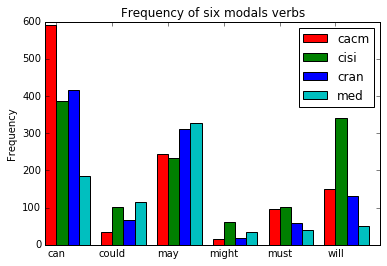

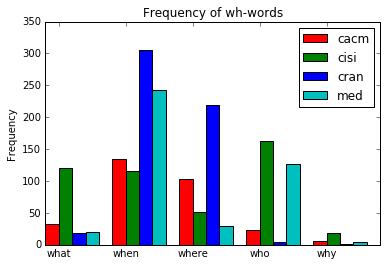

In [101]:
from numpy import arange
from matplotlib import pyplot


# colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black
# "Plot a bar chart showing counts for each word by category"
def bar_chart(categories, words, counts, ylabel, title, colors='rgbcmyk', legendloc = 'upper left'):
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind + c * width, counts[categories[c]], width, color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind + width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc=legendloc)
    pyplot.ylabel(ylabel)
    pyplot.title(title)
    pyplot.show()

modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
    (cat, word.lower()) for cat in cats for word in corpus_reader.words(categories=cat) if word in modals)
counts = {}
for cat in cats:
    counts[cat] = [cfdist[cat][word] for word in modals]
bar_chart(cats, modals, counts, 'Frequency', 'Frequency of six modals verbs', legendloc='upper right')

whs = ['what', 'when', 'where', 'who', 'why']
cfdist = nltk.ConditionalFreqDist(
    (cat, word.lower()) for cat in cats for word in corpus_reader.words(categories=cat) if word in whs)
counts = {}
for cat in cats:
    counts[cat] = [cfdist[cat][word] for word in whs]
bar_chart(cats, whs, counts, 'Frequency', 'Frequency of wh-words', legendloc='upper right')

Low frequency words or unusual words.

In [96]:
import nltk


def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

for i, cat in enumerate(cats):
    print("First 20 low frequency words for category: " + cat.upper())
    print(unusual_words(corpus_reader.words(categories=cat))[0:20])

First 20 low frequency words for category: CACM


['abandoning', 'abbott', 'abbreviated', 'abbreviating', 'abbreviations', 'abcd', 'abd', 'abilities', 'abrahams', 'abscissas', 'abstracting', 'abstractions', 'abstracts', 'academicians', 'accelerates', 'accelerating', 'accepting', 'accepts', 'accessed', 'accesses']
First 20 low frequency words for category: CISI


['aacr', 'abandons', 'abbreviated', 'abbreviating', 'abbreviations', 'aberrystwyth', 'abidjan', 'abilities', 'abno', 'abolished', 'abolishing', 'aboutness', 'abrades', 'abstracting', 'abstractors', 'abstracts', 'academia', 'academicians', 'accademia', 'accelerators']
First 20 low frequency words for category: CRAN


['abbreviated', 'ablated', 'ablating', 'accelerates', 'accelerating', 'accelerations', 'accelerators', 'accentuated', 'accommodated', 'accompanied', 'accompanies', 'accompanying', 'accounted', 'accounts', 'accumulated', 'accumulations', 'achieved', 'achieving', 'ackeret', 'acr']
First 20 low frequency words for category: MED


['aaf', 'aas', 'abdominis', 'aberrations', 'abilities', 'abnormali', 'abnormalities', 'abolished', 'abortions', 'abs', 'abscesses', 'abscopal', 'absorbancy', 'absorptions', 'abstr', 'ac', 'aca', 'acalculia', 'acanthocheilonema', 'accelera']


High frequency words.

In [98]:
from nltk.corpus import stopwords
print(stopwords.words('english')[0:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers']


Stemming

In [ ]:
from nltk import word_tokenize
import re

# simple stemmer
def stem(word):
    regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
    stem, suffix = re.findall(regexp, word)[0]
    return stem

tokens = word_tokenize(raw)
[stem(t) for t in tokens]

corpus_reader.findall(r"<a> (<.*>) <man>")

**Normalizing text** 
* __Stemming__ The Porter and Lancaster stemmers follow their own rules for stripping affixes. Observe that the Porter stemmer correctly handles the word lying (mapping it to lie), while the Lancaster stemmer does not. Stemming is not a well-defined process, and we typically pick the stemmer that best suits the application we have in mind. The Porter Stemmer is a good choice if you are indexing some texts and want to support search using alternative forms of words.
* __Lemmanization__  The WordNet lemmatizer only removes affixes if the resulting word is in its dictionary. This additional checking process makes the lemmatizer slower than the above stemmers. Notice that it doesn't handle lying, but it converts women to woman. The WordNet lemmatizer is a good choice if you want to compile the vocabulary of some texts and want a list of valid lemmas (or lexicon headwords).
* __Non-standard words__ Another normalization task involves identifying non-standard words including numbers, abbreviations, and dates, and mapping any such tokens to a special vocabulary. For example, every decimal number could be mapped to a single token 0.0, and every acronym could be mapped to AAA. This keeps the vocabulary small and improves the accuracy of many language modeling tasks.

In [ ]:
porter = nltk.PorterStemmer()
>>> lancaster = nltk.LancasterStemmer()
>>> [porter.stem(t) for t in tokens]
>>> [lancaster.stem(t) for t in tokens]
>>> wnl = nltk.WordNetLemmatizer()
>>> [wnl.lemmatize(t) for t in tokens]

Tokenization
* __Simple__ by regular expression
* Using ntlk.regexp_tokenize()

In [ ]:
>>> text = 'That U.S.A. poster-print costs $12.40...'
>>> pattern = r'''(?x)    # set flag to allow verbose regexps
...     ([A-Z]\.)+        # abbreviations, e.g. U.S.A.
...   | \w+(-\w+)*        # words with optional internal hyphens
...   | \$?\d+(\.\d+)?%?  # currency and percentages, e.g. $12.40, 82%
...   | \.\.\.            # ellipsis
...   | [][.,;"'?():-_`]  # these are separate tokens; includes ], [
... '''
>>> nltk.regexp_tokenize(text, pattern)
['That', 'U.S.A.', 'poster-print', 'costs', '$12.40', '...']